In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
vs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Projects/ML2/EasyVisa.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [7]:
# Checking the number of rows and columns in the training data
vs.shape

(25480, 12)

In [8]:
# let's create a copy of the data
data = vs.copy()

### Displaying the first few rows of the dataset

In [9]:
# let's view the first 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [10]:
# let's view the last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [11]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Checking for duplicate values

In [12]:
# let's check for duplicate values in the data
data.duplicated().sum()

np.int64(0)

### Checking for missing values

In [13]:
# let's check for missing values in the data
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


### Statistical summary of the dataset

In [14]:
# let's view the statistical summary of the numerical columns in the data
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.043,1979.410,74455.815
std,22877.929,42.367,52815.942
min,-26.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270


- no of employees : min is -26 which looks incorrect and max is very high which may be outlier or data inaccuracy
- Year estd : min is 1800 which goes upto 2016
- Prevailing wage = 2.137 is min which very low and max very high idicating outliers

In [15]:
data.describe(include=["object"])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


 - continent = there 6 continent highest is from Asia
 - Job expereince : Most have job expereince
 - Job training - most require job training
 - Employement region : dataset has 5 region and most from Northeast
 - Wage unit : 4 unique values most is yearly wages
 - Full time : Most of them are full time
 - case status: Most get visa certified

In [16]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in case_id are :
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_

In [17]:
# case_id consists of uniques ID for empyees and hence will not add value to the modeling
data.drop(["case_id"], axis=1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

### Observation on No of employees

In [22]:
# no_of_employees	yr_of_estab	prevailing_wage

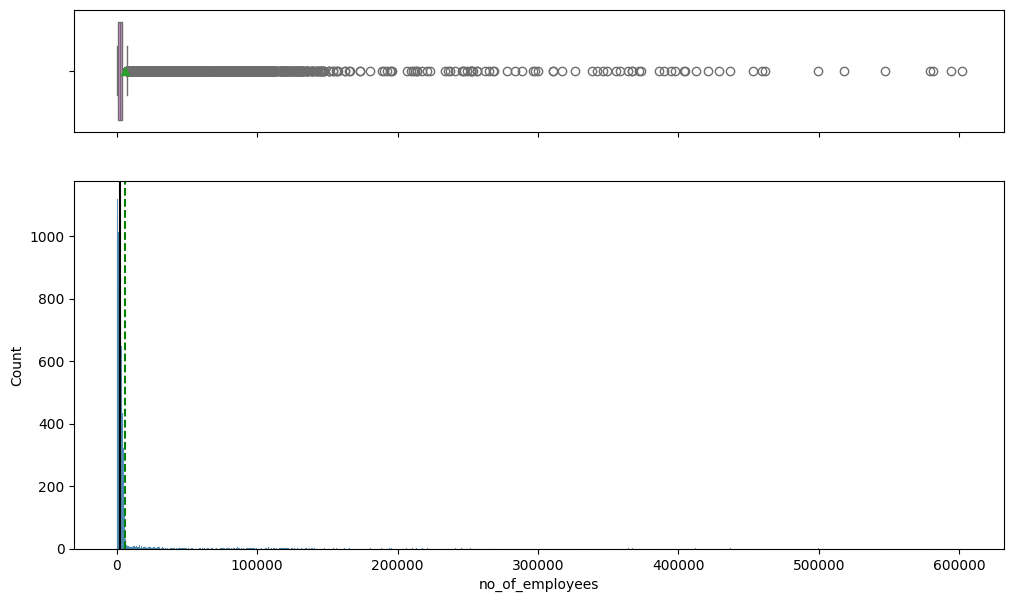

In [23]:
histogram_boxplot(data, "no_of_employees")

- Mean is close to zero and there is many outliers
- Employees count have many negative values in most cases which should be investigated.

### Observation on yr_of_estab

In [24]:
data['yr_of_estab'].median()

1997.0

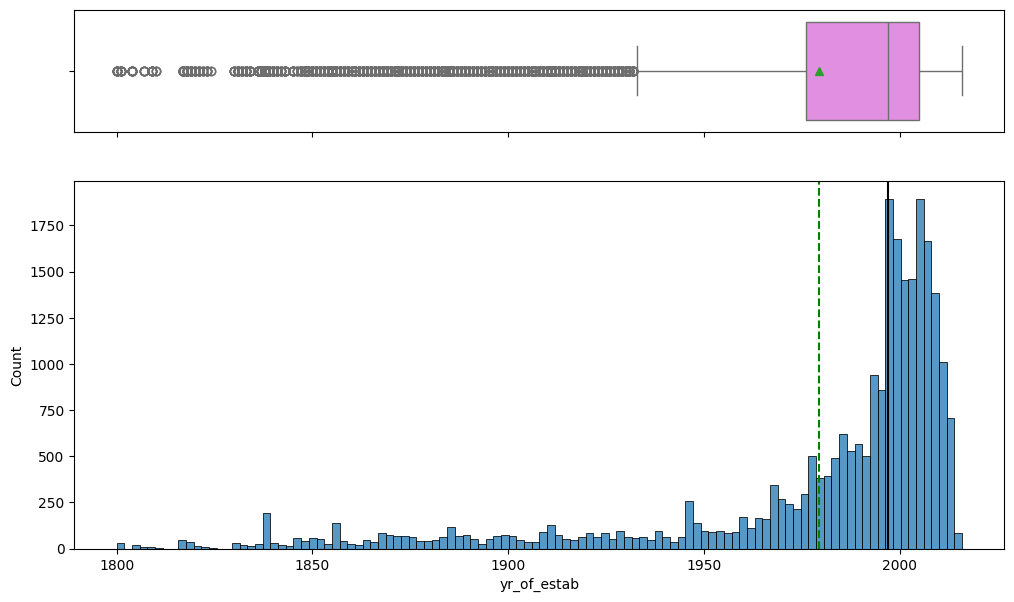

In [25]:
histogram_boxplot(data,'yr_of_estab')

- Left skewed hence most companies establised recently.
- Medain year is close to 1997
- Many outliers in left side meaning there many older companies

### Observation on prevailing_wage

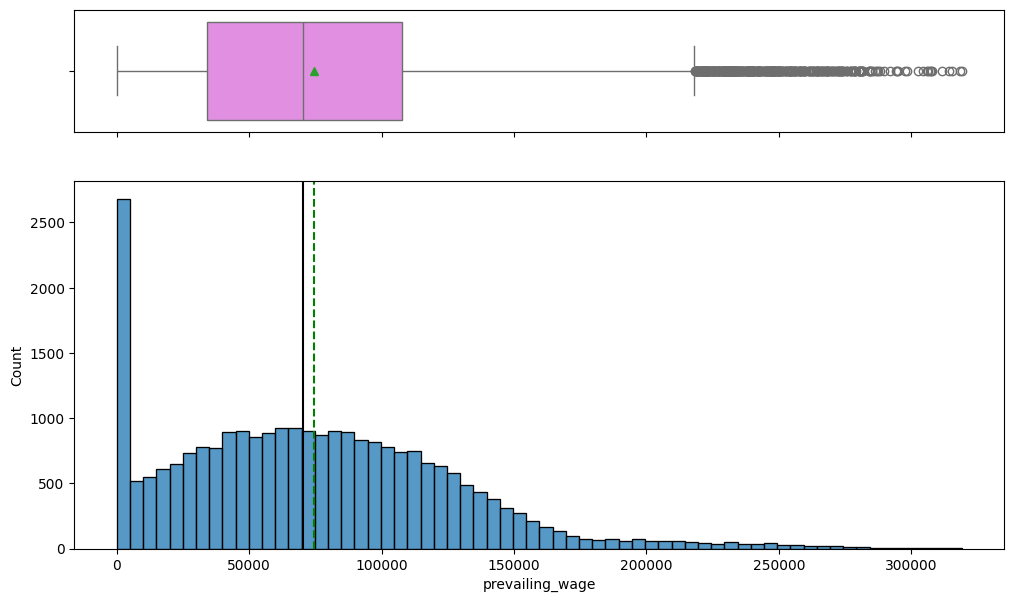

In [26]:
histogram_boxplot(data,'prevailing_wage')

- High count is observed in Zero values which needs to investigated
- Curves almost looks like normal cruve with tail in right side. hence outliers
- Mean and median are almost closer hence Normally distributes curve

### Observation on continent

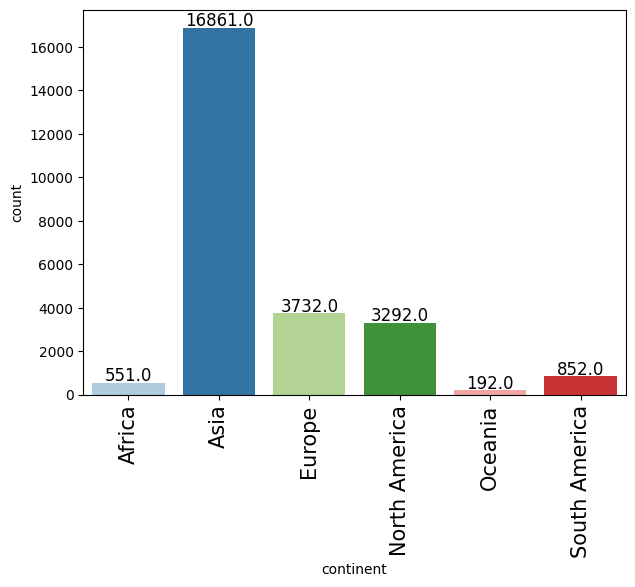

In [27]:
labeled_barplot(data, "continent")

- Asia received highest Visa application followed by Europe

### Observation on education_of_employee

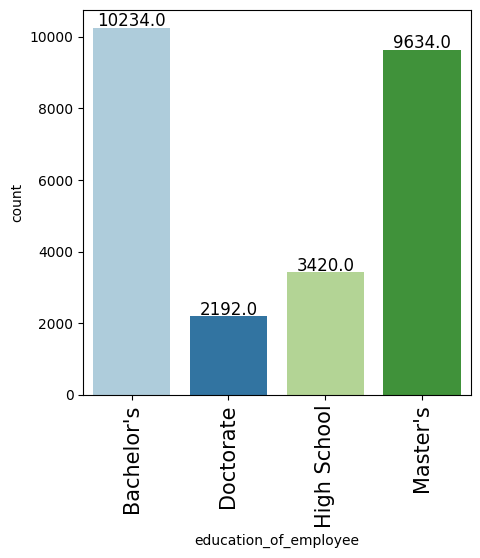

In [28]:
labeled_barplot(data, "education_of_employee")

- Employees with Bachelors degress is highest followed Masters degree

### Observation on job_experience

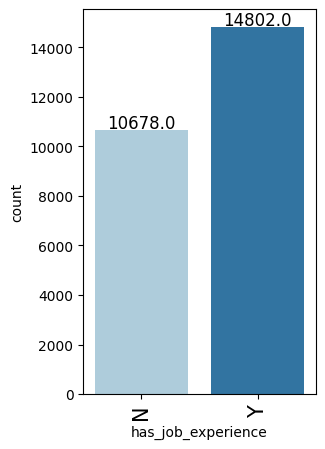

In [29]:
labeled_barplot(data,'has_job_experience')

Most employees have Job experience

### Observation on requires_job_training

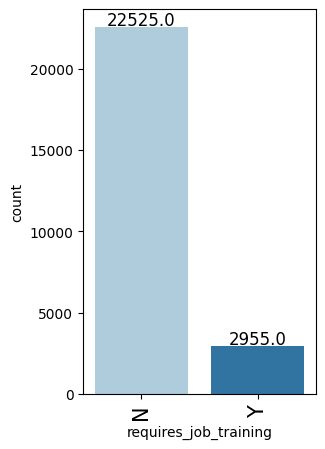

In [30]:
labeled_barplot(data,'requires_job_training')

Most people do not want Job training

### Observation on region_of_employment

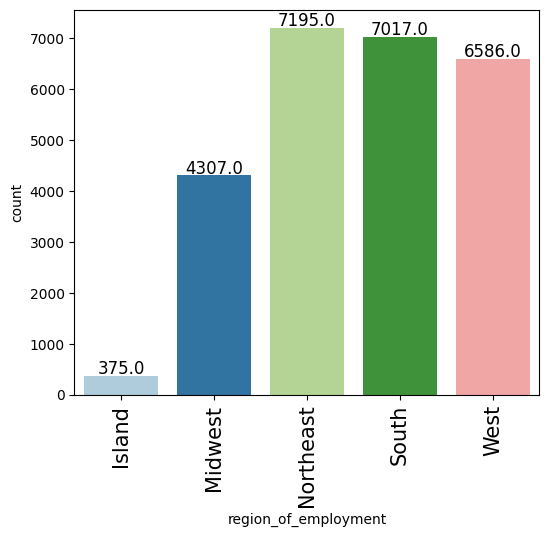

In [31]:
labeled_barplot(data,'region_of_employment')

Northest is highest followed by South and west

### Observation on unit_of_wage

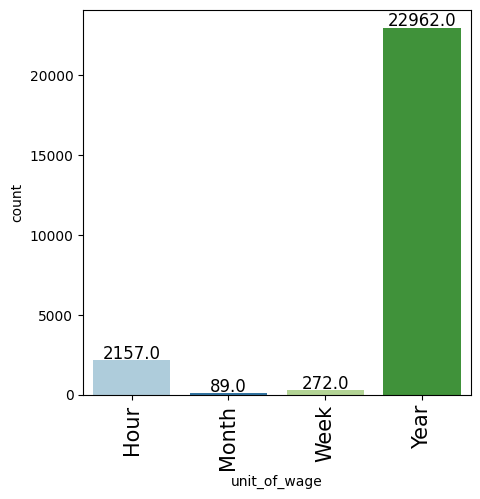

In [32]:
labeled_barplot(data,'unit_of_wage')

unit of wage is mostly in years and followed by Hours

### Observation on full_time_position

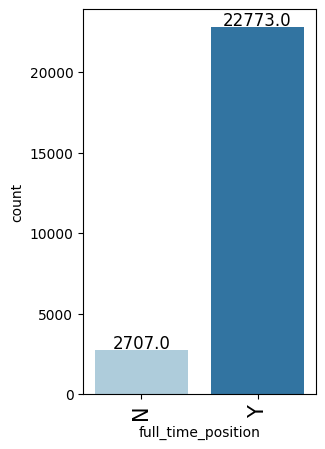

In [33]:
labeled_barplot(data,'full_time_position')

Most employees apply for full time position

### Observation on case_status

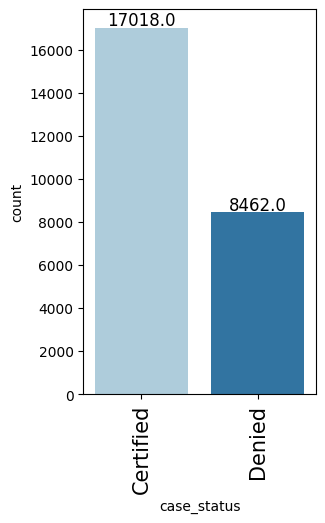

In [34]:
labeled_barplot(data,'case_status')

Most employees get Visa certified and 8462 got denied

### Bivariate Distributions

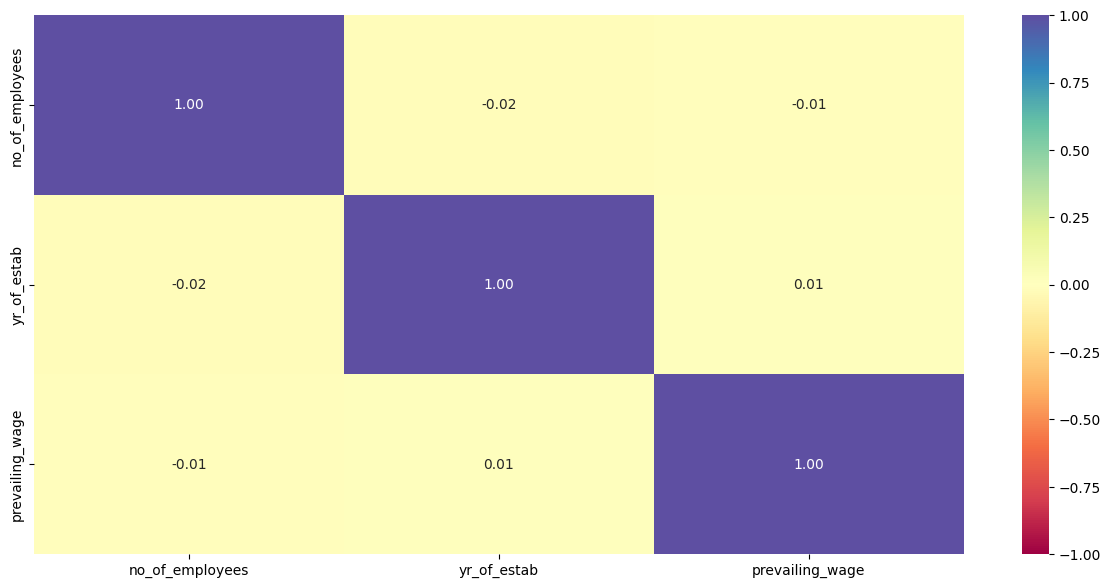

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[['no_of_employees','yr_of_estab','prevailing_wage']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

No meaniful colleration exist

### Continent Vs Case status

In [36]:
case_counts=data.groupby('continent')['case_status'].value_counts().unstack()
(case_counts['Denied'] / case_counts.sum(axis=1))

,0
continent,
Africa,0.279
Asia,0.347
Europe,0.208
North America,0.381
Oceania,0.365
South America,0.421


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


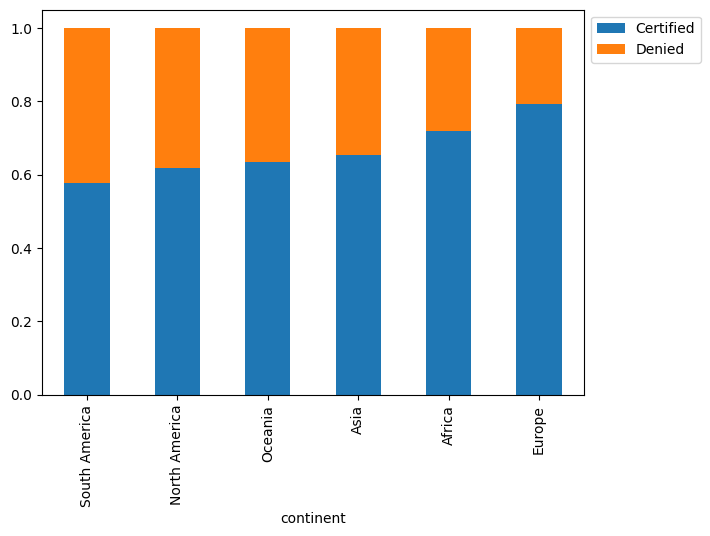

In [37]:
stacked_barplot(data, "continent", "case_status")

- South America has highest denial followed North America

### Education of employees Vs Case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


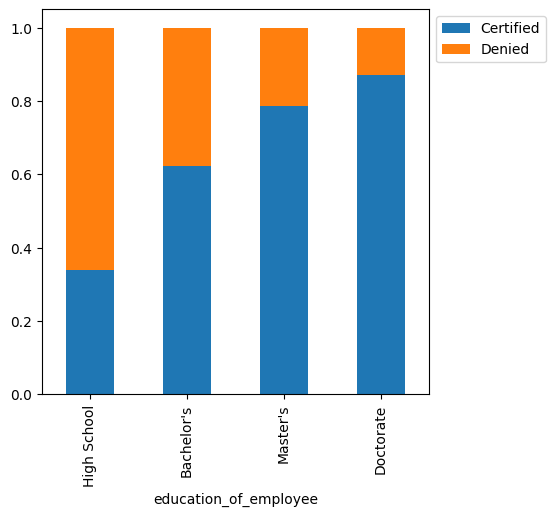

In [38]:
stacked_barplot(data,"education_of_employee", "case_status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

- High School education is mostly denied. Higher the education higher chance of getting visa approved

### Has job experience Vs Case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


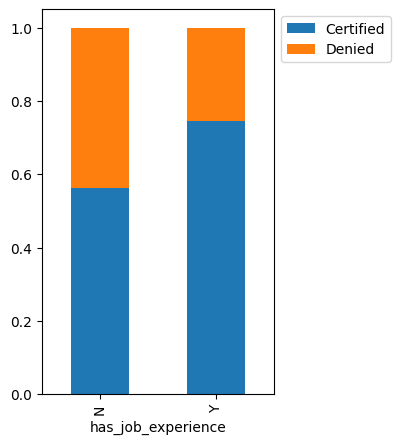

In [39]:
stacked_barplot(data,"has_job_experience", "case_status")

Employees with no job experience denied Visa the most

### require job training Vs Case status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


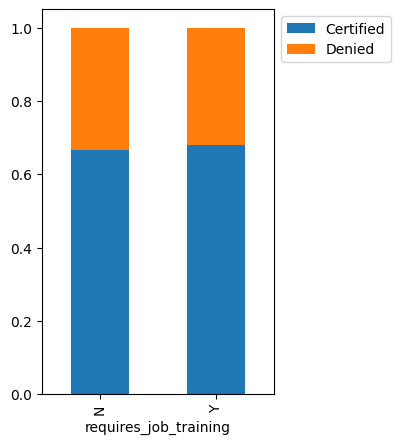

In [40]:
stacked_barplot(data,"requires_job_training", "case_status")

- Job training has less effect on Visa granting

### region of emloyement Vs Case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


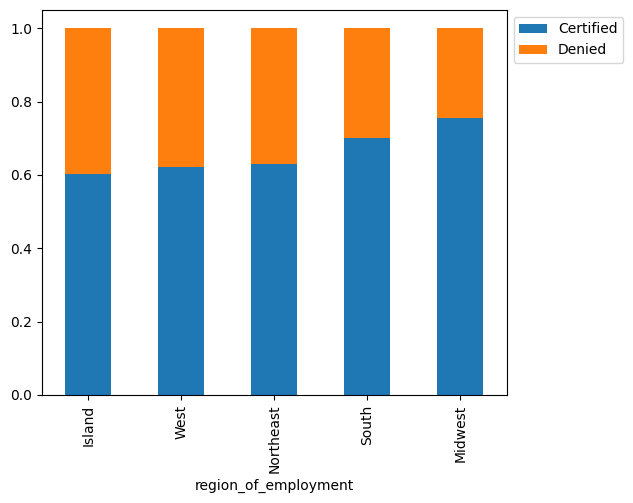

In [41]:
stacked_barplot(data,"region_of_employment", "case_status")

Many are denied from region Island and West

### unit of wage Vs Case Status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


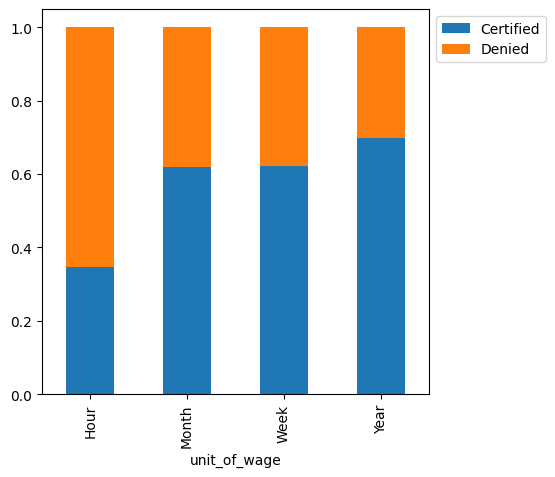

In [42]:
stacked_barplot(data,"unit_of_wage", "case_status") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

Hourly wages are denied the most may be less skilled worker are given hourly wages

### Full time position Vs Case Status

In [43]:
case_counts=data.groupby('full_time_position')['case_status'].value_counts().unstack()
(case_counts['Denied'] / case_counts.sum(axis=1))

,0
full_time_position,
N,0.315
Y,0.334


case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


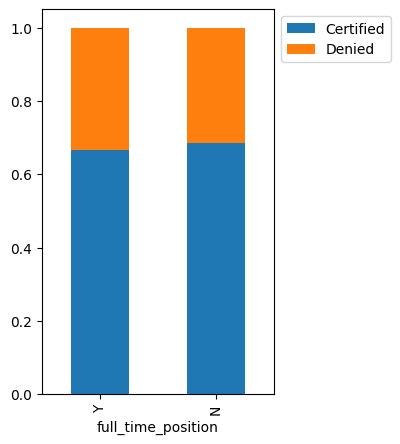

In [44]:
stacked_barplot(data,'full_time_position', "case_status")

- Full time position has no effect on Visa granting

### No of employees Vs case status

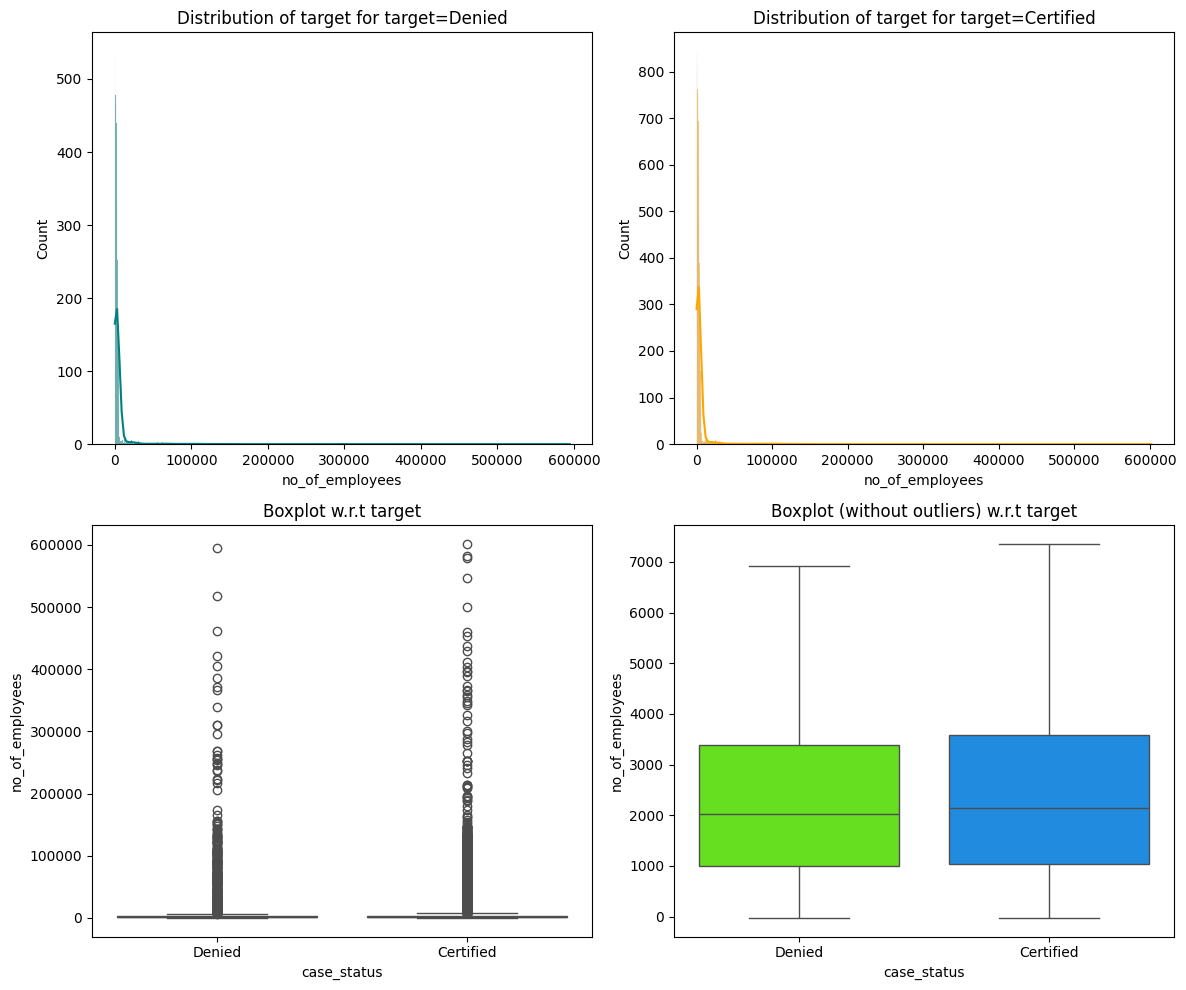

In [45]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

- No of employees has no effect on Visa granted

### Prevailing Wage Vs case status

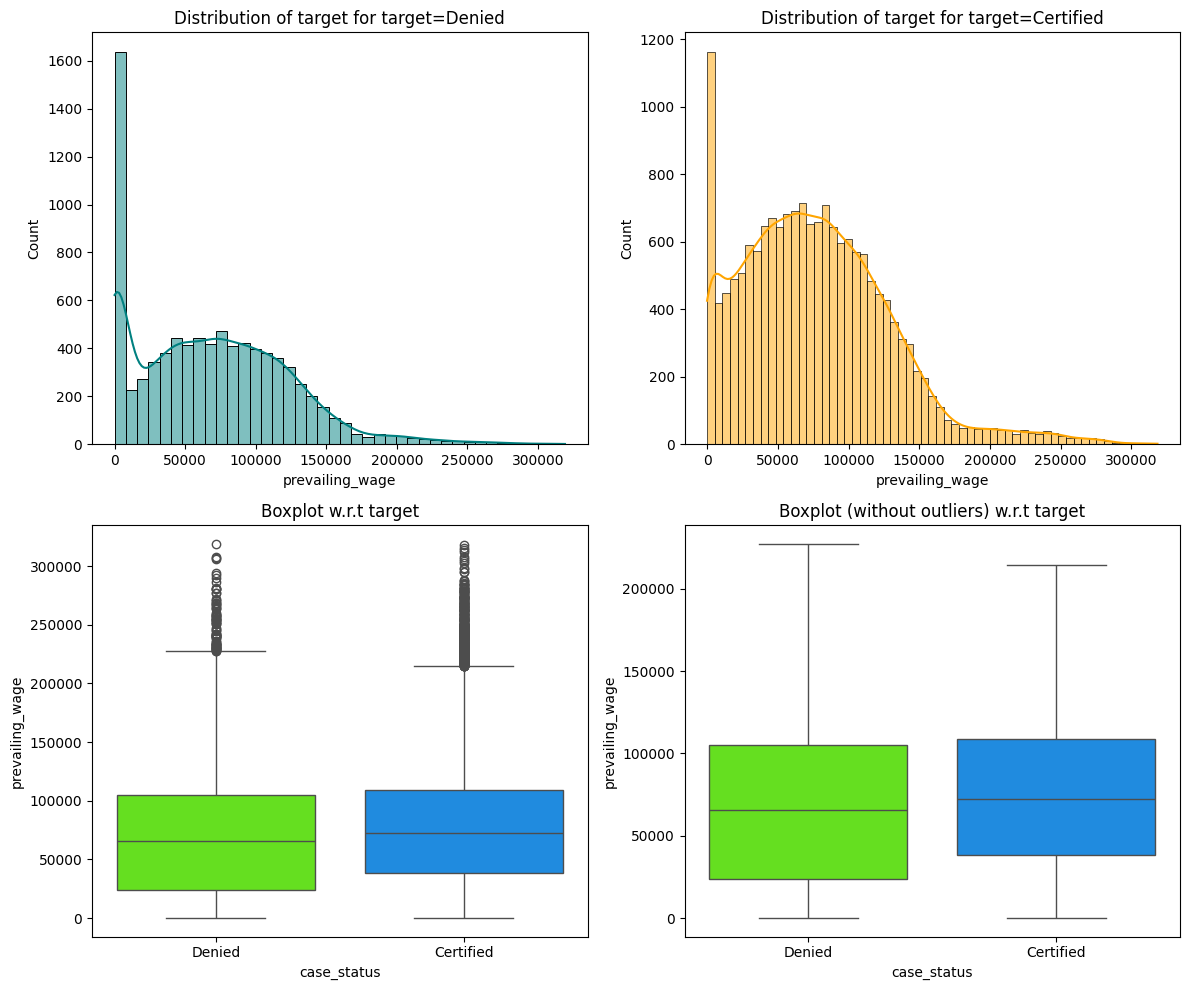

In [46]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

- Median wage of certified is higher than denied implying lower wages are denied visa compared to higher wages

### Year of estd Vs case status

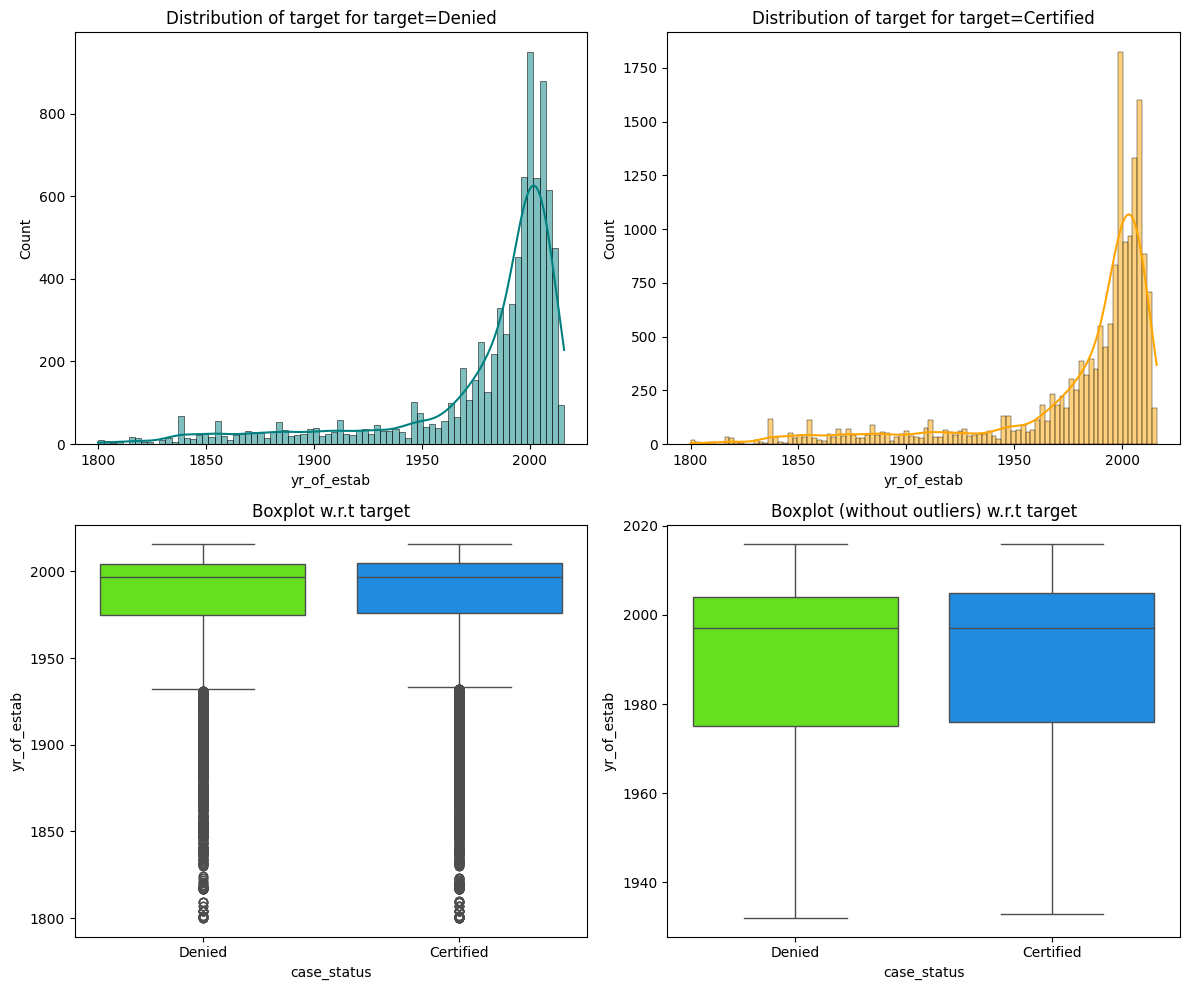

In [47]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

- Year established has effect on Visa granting

## Data Preprocessing

### Outlier Detection

We are not treating outliers as they are orginal values

### Train-Test Split

In [48]:
# creating the copy of the dataframe
df = data.copy()

In [49]:
df["no_of_employees"].replace("-","", inplace=True) ### Replacing negative sign in no of emplyees

In [50]:
df['no_of_employees'] = df['no_of_employees'].apply(lambda x:  x * -1 if x < 0 else x)

In [51]:
df[df["no_of_employees"]<0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [52]:
data.isna().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [53]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [54]:
df['case_status'].value_counts()

,count
case_status,
Certified,17018
Denied,8462


In [55]:
df['case_status']=df['case_status'].replace({'Denied':0, 'Certified':1})

In [56]:
# Dividing train data into X and y

X = df.drop(["case_status"], axis=1)
y = df["case_status"]

In [57]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(16307, 10) (4077, 10) (5096, 10)


In [58]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [59]:
# check the top 5 rows from the train dataset
print(X_train.shape, X_val.shape, X_test.shape)

(16307, 21) (4077, 21) (5096, 21)


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a employee will be denied Visa and the he gets it
- Predicting a employee will be certified Visa and the he is denied

Which case is more important?

- Predicting a employee will be certified Visa and the he is denied. As business are in high demand of human resources it is important certfy all the employees correctly and denying Visa to devserved employees will negatively affect the business and economy

**How to reduce this loss i.e need to reduce False Negatives??**

-We want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank providing Visa to coorect employees.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [62]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging",  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.22967882336233
Random forest: 84.24377278563936
GBM: 87.34720057178234
Adaboost: 88.95412888111791
Xgboost: 85.2813630063411
dtree: 74.56621789676986

validation Performance:

Bagging: 0.7840616966580977
Random forest: 0.8431876606683805
GBM: 0.8626514873301506
Adaboost: 0.884318766066838
Xgboost: 0.8464928387807565
dtree: 0.7495409474843923


In [63]:
# Initialize a list to store results
results = []

print("\nTraining and Validation Performance Difference for Original date:\n")

for name, model in models:
    model.fit(X_train, y_train)

    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference = scores_train - scores_val

    # Append results to the list
    results.append([name, scores_train, scores_val, difference])

# Convert to DataFrame
df_Org_results = pd.DataFrame(results, columns=['Model', 'Training Score', 'Validation Score', 'Difference'])

# Display the DataFrame
df_Org_results


Training and Validation Performance Difference for Original date:



,Model,Training Score,Validation Score,Difference
0,Bagging,0.986,0.784,0.202
1,Random forest,1.000,0.843,0.157
2,GBM,0.876,0.863,0.013
3,Adaboost,0.890,0.884,0.005
4,Xgboost,0.937,0.846,0.091
5,dtree,1.000,0.750,0.250


### Model Building - Oversampled Data

In [64]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10891
Before Oversampling, counts of label 'No': 5416 

After Oversampling, counts of label 'Yes': 10891
After Oversampling, counts of label 'No': 10891 

After Oversampling, the shape of train_X: (21782, 21)
After Oversampling, the shape of train_y: (21782,) 



In [65]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging",  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 74.66721956938486
Random forest: 81.0760784869008
GBM: 84.9141378320735
Adaboost: 85.53846277030391
Xgboost: 83.81240331050502
dtree: 71.69227002386499

Validation Performance:

Bagging: 0.7488064634594197
Random forest: 0.8116048475945649
GBM: 0.8329048843187661
Adaboost: 0.8479618068307014
Xgboost: 0.8395152405435182
dtree: 0.7168564083731179


In [66]:
# Initialize a list to store results
results = []

print("\nTraining and Validation Performance Difference for Oversampled:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)

    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference = scores_train - scores_val

    # Append results to the list
    results.append([name, scores_train, scores_val, difference])

# Convert to DataFrame
df_Over_results = pd.DataFrame(results, columns=['Model', 'Training Score', 'Validation Score', 'Difference'])

# Display the DataFrame
df_Over_results


Training and Validation Performance Difference for Oversampled:



,Model,Training Score,Validation Score,Difference
0,Bagging,0.985,0.749,0.236
1,Random forest,1.000,0.812,0.188
2,GBM,0.846,0.833,0.013
3,Adaboost,0.859,0.848,0.011
4,Xgboost,0.914,0.840,0.075
5,dtree,1.000,0.717,0.283


### Model Building - Undersampled Data

In [67]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [68]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10891
Before Under Sampling, counts of label 'No': 5416 

After Under Sampling, counts of label 'Yes': 5416
After Under Sampling, counts of label 'No': 5416 

After Under Sampling, the shape of train_X: (10832, 21)
After Under Sampling, the shape of train_y: (10832,) 



In [69]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging",  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1,class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 60.0078025711005
Random forest: 66.59944189469596
GBM: 71.84283781895992
Adaboost: 70.25445240601991
Xgboost: 68.05772198996229
dtree: 63.49739176062121

Validation Performance:

Bagging: 0.6107234667645979
Random forest: 0.6709511568123393
GBM: 0.7161219243481455
Adaboost: 0.689680499449137
Xgboost: 0.6845391112743298
dtree: 0.6228424531766434


In [70]:
import pandas as pd
from sklearn.metrics import recall_score

# Initialize a list to store results
results = []

print("\nTraining and Validation Performance Difference undersampled data:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)

    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference = scores_train - scores_val

    # Append results to the list
    results.append([name, scores_train, scores_val, difference])

# Convert to DataFrame
df_un_results = pd.DataFrame(results, columns=['Model', 'Training Score', 'Validation Score', 'Difference'])

# Display the DataFrame
df_un_results



Training and Validation Performance Difference undersampled data:



,Model,Training Score,Validation Score,Difference
0,Bagging,0.970,0.611,0.359
1,Random forest,1.000,0.671,0.329
2,GBM,0.730,0.716,0.014
3,Adaboost,0.697,0.690,0.008
4,Xgboost,0.873,0.685,0.189
5,dtree,1.000,0.623,0.377


In [71]:
import pandas as pd
from sklearn.metrics import recall_score

# Initialize a list to store results
results = []

# Define different data versions
datasets = {
    "Original": (X_train, y_train),
    "Undersampled": (X_train_un, y_train_un),
    "Oversampled": (X_train_over, y_train_over)
}

for data_version, (X_train_data, y_train_data) in datasets.items():
    for name, model in models:
        model.fit(X_train_data, y_train_data)

        scores_train = recall_score(y_train_data, model.predict(X_train_data))
        scores_val = recall_score(y_val, model.predict(X_val))
        difference = scores_train - scores_val

        # Append results with dataset version
        results.append([data_version, name, scores_train, scores_val, difference])

# Convert to DataFrame
df_results = pd.DataFrame(results, columns=['Dataset', 'Model', 'Training Score', 'Validation Score', 'Difference'])

# Display the DataFrame
df_results


,Dataset,Model,Training Score,Validation Score,Difference
0,Original,Bagging,0.986,0.784,0.202
1,Original,Random forest,1.000,0.843,0.157
2,Original,GBM,0.876,0.863,0.013
3,Original,Adaboost,0.890,0.884,0.005
4,Original,Xgboost,0.937,0.846,0.091
5,Original,dtree,1.000,0.750,0.250
6,Undersampled,Bagging,0.970,0.611,0.359
7,Undersampled,Random forest,1.000,0.671,0.329
8,Undersampled,GBM,0.730,0.716,0.014
9,Undersampled,Adaboost,0.697,0.690,0.008


In [ ]:
X

We can tune GBM , Adaboost and Xgboost further

### Hyperparameter Tuning

### Orginal Data

#### Tuning AdaBoost using original data

In [72]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.97254644151052:
CPU times: user 1.72 s, sys: 340 ms, total: 2.06 s
Wall time: 1min 15s


In [73]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 30,
    learning_rate= 0.1,
    estimator= DecisionTreeClassifier(max_depth=1, random_state=1))

tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=1)

In [74]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.692,0.972,0.692,0.808


In [75]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, X_val, y_val) ## Complete the code to check the performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.693,0.971,0.693,0.809


#### Tuning Gradient Boosting using original data

In [76]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(100), 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9399508034578334:
CPU times: user 3.97 s, sys: 538 ms, total: 4.5 s
Wall time: 4min 11s


In [77]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=1,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.01,
    n_estimators=100,
    subsample=0.9,
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, random_state=1,
                           subsample=0.9)

In [78]:
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_train, y_train) ##  to check the performance on validation set
gbm_train

,Accuracy,Recall,Precision,F1
0,0.719,0.940,0.723,0.817


In [79]:
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val) ##  to check the performance on validation set
gbm_val

,Accuracy,Recall,Precision,F1
0,0.720,0.939,0.724,0.818


#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [80]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = 2, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': np.int64(50), 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:
CPU times: user 1.83 s, sys: 232 ms, total: 2.06 s
Wall time: 57.5 s


In [81]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=np.int64(50),
    learning_rate=0.01,
    gamma=3,
)##

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

In [82]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.668,1.000,0.668,0.801


In [83]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.668,1.000,0.668,0.801


### Oversampled data

#### Tuning AdaBoost using oversampled data

In [84]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9343497977817308:
CPU times: user 1.73 s, sys: 274 ms, total: 2.01 s
Wall time: 1min 33s


In [85]:
# Creating new pipeline with best parameters
tuned_adb_over = AdaBoostClassifier( random_state=1,
    n_estimators= 10,
    learning_rate= 0.1,
    estimator= DecisionTreeClassifier(max_depth=1, random_state=1))

tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [86]:
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train, y_train)
adb_train_over

,Accuracy,Recall,Precision,F1
0,0.712,0.934,0.719,0.813


In [87]:
# Checking model's performance on validation set
adb_val_over =  model_performance_classification_sklearn(tuned_adb_over, X_val, y_val) ## Complete the code to check the performance on validation set
adb_val_over

,Accuracy,Recall,Precision,F1
0,0.710,0.928,0.719,0.811


#### Tuning Gradient Boosting using oversampled data

In [88]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8785215836448679:
CPU times: user 6.73 s, sys: 620 ms, total: 7.35 s
Wall time: 4min 59s


In [89]:
# Creating new pipeline with best parameters
tuned_gbm_over = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.01,
    n_estimators=100,
    subsample=0.7,
)

tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [90]:
gbm_train_over = model_performance_classification_sklearn(tuned_gbm_over, X_train, y_train)
gbm_train_over

,Accuracy,Recall,Precision,F1
0,0.736,0.884,0.760,0.818


In [91]:
gbm_val_over= model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_val_over

,Accuracy,Recall,Precision,F1
0,0.737,0.876,0.765,0.816


#### Tuning XGBoost Model with oversampled data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [92]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': np.int64(50), 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:
CPU times: user 3 s, sys: 279 ms, total: 3.28 s
Wall time: 1min 8s


In [93]:
tuned_xgb_over = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=np.int64(50),
    learning_rate=0.01,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

In [94]:
xgb_train_over = model_performance_classification_sklearn(tuned_xgb_over, X_train, y_train)
xgb_train_over

,Accuracy,Recall,Precision,F1
0,0.668,1.000,0.668,0.801


In [95]:
xgb_val_over = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgb_val_over

,Accuracy,Recall,Precision,F1
0,0.668,1.000,0.668,0.801


#### Undersampled data

#### Tuning AdaBoost using oversampled data

In [96]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9333455993839717:
CPU times: user 1.41 s, sys: 189 ms, total: 1.6 s
Wall time: 55.6 s


In [97]:
# Creating new pipeline with best parameters
tuned_adb_under = AdaBoostClassifier( random_state=1,
    n_estimators= 10,
    learning_rate= 0.1,
    estimator= DecisionTreeClassifier(max_depth=1, random_state=1))

tuned_adb_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [98]:
adb_train_under = model_performance_classification_sklearn(tuned_adb_under, X_train_un, y_train_un)
adb_train_under

,Accuracy,Recall,Precision,F1
0,0.599,0.933,0.559,0.700


In [99]:
# Checking model's performance on validation set
adb_val_under =  model_performance_classification_sklearn(tuned_adb_under, X_val, y_val) ## Complete the code to check the performance on validation set
adb_val_under

,Accuracy,Recall,Precision,F1
0,0.710,0.928,0.719,0.811


#### Tuning Gradient Boosting using oversampled data

In [100]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7487074649139842:
CPU times: user 3.62 s, sys: 351 ms, total: 3.97 s
Wall time: 2min 41s


In [101]:
# Creating new pipeline with best parameters
tuned_gbm_under = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.01,
    n_estimators=100,
    subsample=0.7,
)

tuned_gbm_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [102]:
gbm_train_under = model_performance_classification_sklearn(tuned_gbm_under, X_train_un, y_train_un) ##  to check the performance on validation set
gbm_train_under

,Accuracy,Recall,Precision,F1
0,0.705,0.747,0.689,0.717


In [115]:
gbm_val_under= model_performance_classification_sklearn(tuned_gbm, X_val, y_val) ##  to check the performance on validation set
gbm_val_under

,Accuracy,Recall,Precision,F1
0,0.720,0.939,0.724,0.818


#### Tuning XGBoost Model with oversampled data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [119]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': np.int64(50), 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:
CPU times: user 1.69 s, sys: 243 ms, total: 1.93 s
Wall time: 49.1 s


In [121]:
tuned_xgb_under = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=np.int64(50),
    learning_rate=0.01,
    gamma=3,
)

tuned_xgb_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

In [122]:
xgb_train_under = model_performance_classification_sklearn(tuned_xgb_under, X_train_un, y_train_un) ##  the code to check the performance on original train set
xgb_train_under

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


In [123]:
xgb_val_under = model_performance_classification_sklearn(tuned_xgb_under, X_val, y_val) ##  the code to check the performance on validation set
xgb_val_under

,Accuracy,Recall,Precision,F1
0,0.668,1.000,0.668,0.801


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        gbm_train.T,
        xgb_train.T,
        adb_train_over.T,
        gbm_train_over.T,
        xgb_train_over.T,
        adb_train_under.T,
        gbm_train_under.T,
        xgb_train_under.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost trained with Original data",
    "Gradient boosting trained with Original data",
    "Xg boosting trained with Original dataa",
    "Adaboost trained with oversample data",
    "Gradient boosting trained with oversample data",
    "Xg boosting trained with oversample dataa",
    "Adaboost trained with undersample data",
    "Gradient boosting trained with undersample data",
    "Xg boosting trained with undersample data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Adaboost trained with Original data,Gradient boosting trained with Original data,Xg boosting trained with Original dataa,Adaboost trained with oversample data,Gradient boosting trained with oversample data,Xg boosting trained with oversample dataa,Adaboost trained with undersample data,Gradient boosting trained with undersample data,Xg boosting trained with undersample data
Accuracy,0.692,0.719,0.668,0.712,0.736,0.668,0.599,0.705,0.500
Recall,0.972,0.940,1.000,0.934,0.884,1.000,0.933,0.747,1.000
Precision,0.692,0.723,0.668,0.719,0.760,0.668,0.559,0.689,0.500
F1,0.808,0.817,0.801,0.813,0.818,0.801,0.700,0.717,0.667


In [109]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        gbm_val.T,
        xgb_val.T,
        adb_val_over.T,
        gbm_val_over.T,
        xgb_val_over.T,
        adb_val_under.T,
        gbm_val_under.T,
        xgb_val_under.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Adaboost trained with Original data",
    "Gradient boosting trained with Original data",
    "Xg boosting trained with Original dataa",
    "Adaboost trained with oversample data",
    "Gradient boosting trained with oversample data",
    "Xg boosting trained with oversample dataa",
    "Adaboost trained with undersample data",
    "Gradient boosting trained with undersample data",
    "Xg boosting trained with undersample dataa",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Adaboost trained with Original data,Gradient boosting trained with Original data,Xg boosting trained with Original dataa,Adaboost trained with oversample data,Gradient boosting trained with oversample data,Xg boosting trained with oversample dataa,Adaboost trained with undersample data,Gradient boosting trained with undersample data,Xg boosting trained with undersample dataa
Accuracy,0.693,0.720,0.668,0.710,0.737,0.668,0.710,0.720,0.668
Recall,0.971,0.939,1.000,0.928,0.876,1.000,0.928,0.939,1.000
Precision,0.693,0.724,0.668,0.719,0.765,0.668,0.719,0.724,0.668
F1,0.809,0.818,0.801,0.811,0.816,0.801,0.811,0.818,0.801


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [110]:
# Let's check the performance on test set
grad_test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
grad_test

,Accuracy,Recall,Precision,F1
0,0.719,0.930,0.726,0.816


### Feature Importances

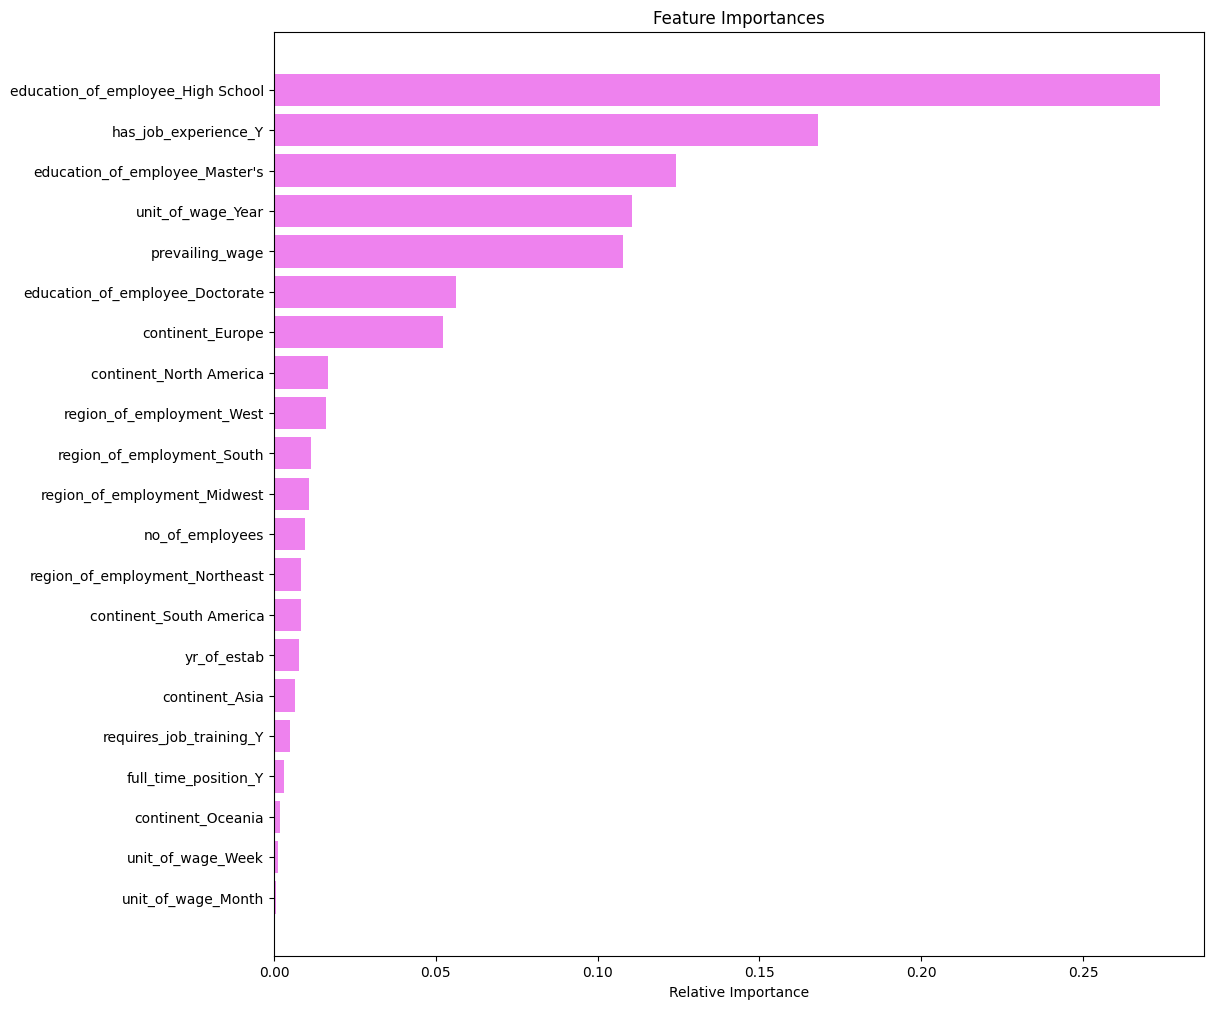

In [111]:
feature_names = X_train.columns
importances =  tuned_gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions
